In [19]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
from avro import schema, datafile, io
from avro.datafile import DataFileReader
from avro.io import DatumReader
import random

In [20]:
m1 = 10
m2 = 10
freq = 2048
delta_t = 1.0 / 2048
delta_f = 1.0 / 2048
flow = 30.0

In [24]:
t = 8
Fs = 1024 * 2
Dt = 1.0 / Fs

Df = 0.5 / t
Fmax = 1.0 / Dt / 2

Tlen = int(t / Dt)
flen = int(Tlen / 2 + 1)

hp = 


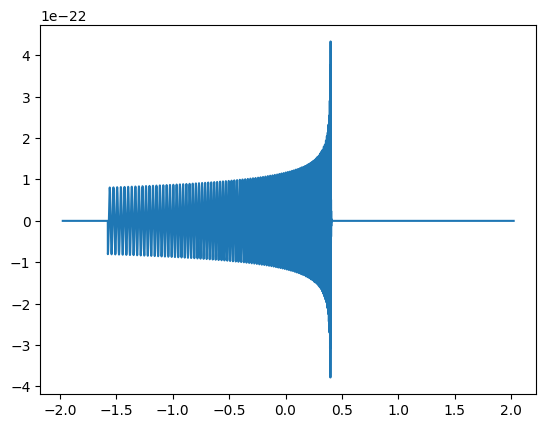

In [22]:
hp, hc = get_td_waveform(
    approximant="IMRPhenomT",
    mass1=m1,
    mass2=m2,
    delta_t=Dt,
    f_lower=30,
)

scale = 500
hp /= scale
hp.resize(8192)
hc.resize(8192)
hp.roll(len(hp) // random.randint(2, 19))
hp.cyclic_time_shift(hp.start_time)

print("hp = ")
plt.plot(hp.sample_times, hp)
plt.show()

In [28]:
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, Df, flow)

psd(flen, Df, flow)

noisesamples = int(4 / Dt)
noise = noise_from_psd(noisesamples, Dt, psd, seed=124)

noise._epoch = hp._epoch
signal = noise + hp

plt.specgram(signal, Fs=1.0 / delta_t)
plt.show()

TypeError: 'FrequencySeries' object is not callable

In [ ]:
assert flen == int(Fmax / Df) + 1
psd = pycbc.psd.aLIGOZeroDetHighPower(
    flen,
)

AssertionError: 